In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

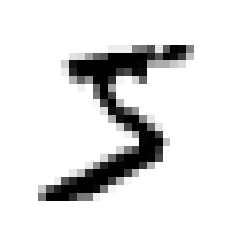

Image :  5


In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt

ex_digit = X.to_numpy()[0]
ex_digit_image = ex_digit.reshape(28,28)

plt.imshow(ex_digit_image, cmap='binary')
plt.axis('off')
plt.show()
print("Image : ", y[0])

In [33]:
import numpy as np

y = y.astype(np.uint8)
type(y[0])

numpy.uint8

In [34]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [35]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='hinge') #hinge => SVM
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [48]:
sgd_clf.predict([X_test.to_numpy()[0]])

/Users/seunguooklim/opt/anaconda3/envs/HOML/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [51]:
y_test_5.to_numpy()[0]

False

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)
sgd_clf = SGDClassifier(random_state=42, loss='hinge') #hinge => SVM


for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    accuracy = n_correct / len(y_pred)
    
    print(accuracy)

0.95035
0.96035
0.9604


In [135]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [141]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [142]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [143]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

y_train_pred

array([ True, False, False, ...,  True, False, False])

In [144]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [147]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [148]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [150]:
sgd_clf = SGDClassifier(random_state=42, loss='hinge') #hinge => SVM

sgd_clf.fit(X_train, y_train)


KeyError: 0

In [156]:
print(sgd_clf.predict([X_train.to_numpy()[0]]))
sgd_clf.decision_function([X_train.to_numpy()[0]])

[3]


/Users/seunguooklim/opt/anaconda3/envs/HOML/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/Users/seunguooklim/opt/anaconda3/envs/HOML/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [157]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

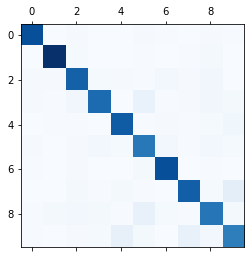

In [162]:
plt.matshow(conf_mx, cmap=plt.cm.Blues)
plt.show()